In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

# Digits dataset for clustering

* `8x8` digit images with 180 samples per class
* Form 10 classes it has 1797 images
* Each pixel has values between 0 to 16


In [5]:
digits = load_digits()

Random initialization 

n_init: running k means 50 times with different centroid seeds

max_iter: in each iterations we will be running k means 500 times

In [16]:
kmeans_kwargs = {'init': 'random',
                 'n_init': 50,
                 'max_iter': 500,
                 'random_state': 0}

**Pipeline** in two stages:
* Preprocessing with MinMaxScaler
* clustering with KMeans Custering Algorithm

In [17]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
pipeline = Pipeline([('scaler',MinMaxScaler()),
                     ('kmeans',KMeans(n_clusters=10, **kmeans_kwargs))])
pipeline.fit(digits.data)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kmeans',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

Cluster centroids can be accessed via: cluster_centers_

In [23]:
cluster_centers = pipeline[-1].cluster_centers_

Displaying Cluster Centroids:


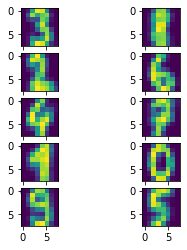

In [25]:
fig, ax = plt.subplots(5,2,figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10,8,8)):
  i.imshow(j)

Discovering optimal number of clusters with **Elbow** and **Silhouette**

## 1. Elbow Method

Keeping track of SSE 


In [26]:
sse_digit=[]

scaled_digits= MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  sse_digit.append(kmeans.inertia_)

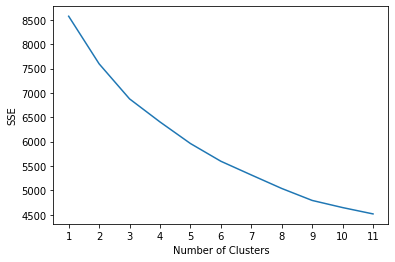

In [28]:
plt.plot(range(1,12), sse_digit)
plt.xticks(range(1,12))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

There is a slight elbow at `k=9` which could point to the fact that a few digits may have been merged in one cluster.

## 2. Silhouette Method

In [29]:
sil_coef_digits = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  score = silhouette_score(digits.data, kmeans.labels_)
  sil_coef_digits.append(score)

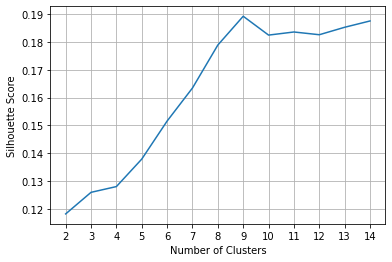

In [30]:
plt.plot(range(2,15), sil_coef_digits)
plt.xticks(range(2,15))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

This graph points to the fact that `k=9`; this could be because some of the digits like 1 and 7 may have striking similarity

In [32]:
#Get the value of K for which the Silhouette Score is highest
print(np.argmax(sil_coef_digits)+2)

9
